# Step 1: Undestanding the Problem


- Aim of the problem is extract and present key insights and recommendations from the dataset (including text attributes) using a combination of descriptive and natural language processing techniques.

- Features available are:

    - reviewerID: Instrument reviewerId

    - asin: Instrument ID to identify the instuments uniquely

    - reviewerName: Number of person who has revieved the Instument

    - helpful: How helful the revieves were

    - overall: The rating provided by the reviewer for the instrument

    - summary : The description about the product as provided by the reviewver
    
    - unixReviewTime: Unix time of the review
    
    - reviewTime: Date of the review

Data Source: Data Set Shared by Bank of Ireland for submitting application for the Lead Data Analyst position we have available within our Group Internal Audit team.


# Step 2: Import Libs and Dataset

In [1]:
#Libraries required for data descriptions and visualisations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Libraries for Natural Language Processing in this case text processing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from string import punctuation
import re
import string

#Libraries for Building ML Model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC


#Libraries for Data Validation of ML Model Build
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Whiz.Ai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# read the Json file 

df = pd.read_json('Musical_Instruments_5.json', lines=True)

# Step 3: Understanding the dataset provided


reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64


<AxesSubplot:>

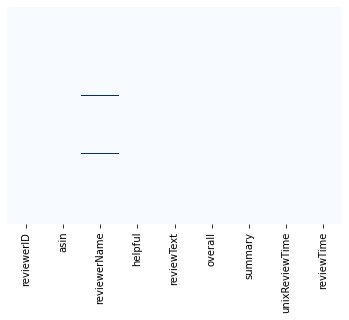

In [3]:
# check if there are any Null values
print(df.isnull().sum())
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [4]:
# Check the dataframe info for datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      10261 non-null  object
 1   asin            10261 non-null  object
 2   reviewerName    10234 non-null  object
 3   helpful         10261 non-null  object
 4   reviewText      10261 non-null  object
 5   overall         10261 non-null  int64 
 6   summary         10261 non-null  object
 7   unixReviewTime  10261 non-null  int64 
 8   reviewTime      10261 non-null  object
dtypes: int64(2), object(7)
memory usage: 721.6+ KB


In [5]:
# Read the dataframe to get the reference of the data prresent in the columns

df.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [6]:
df.groupby('overall').describe()


unixReviewTime                                            \
                 count          mean           std           min   
overall                                                            
1                217.0  1.363610e+09  3.693997e+07  1.141344e+09   
2                250.0  1.361242e+09  3.770940e+07  1.190678e+09   
3                772.0  1.361718e+09  3.633831e+07  1.161389e+09   
4               2084.0  1.359799e+09  3.914760e+07  1.095466e+09   
5               6938.0  1.360608e+09  3.757515e+07  1.096416e+09   

                                                                 
                  25%           50%           75%           max  
overall                                                          
1        1.347926e+09  1.370995e+09  1.390349e+09  1.405210e+09  
2        1.342116e+09  1.369872e+09  1.389506e+09  1.405210e+09  
3        1.343282e+09  1.369008e+09  1.389053e+09  1.405901e+09  
4        1.342915e+09  1.369138e+09  1.388707e+09  1.405987e+09  
5        1.343606e+09  1.367971e+09  1.388945e+09  1.405901e+09

In [7]:
print('Data Set size ----' , df.shape)
print()
print('Unique Instruments Reviewed       : ' , len(df.asin.unique()))
print('Unique Reviewers who reviewed     : ' , len(df.reviewerID.unique()))
print('Unique Reviewers Name             : ' , len(df.reviewerName.unique()))
#print('Unique helpful : ' , len(df.helpful.unique()))
print('Unique Messages Shared by reviewer: ' , len(df.reviewText.unique()))
print('Unique Summary Shared by Reviewer : ' , len(df.summary.unique()))
print('Unique unixReviewTime             : ' , len(df.unixReviewTime.unique()))
print('Unique reviewTime                 : ' , len(df.reviewTime.unique()))
print('Unique Overall Rating             : ' , len(df.overall.unique()))
print('Unique Overall Ratings            : ' , df.overall.unique())




Data Set size ---- (10261, 9)

Unique Instruments Reviewed       :  900
Unique Reviewers who reviewed     :  1429
Unique Reviewers Name             :  1398
Unique Messages Shared by reviewer:  10255
Unique Summary Shared by Reviewer :  8852
Unique unixReviewTime             :  1570
Unique reviewTime                 :  1570
Unique Overall Rating             :  5
Unique Overall Ratings            :  [5 3 4 2 1]


In [8]:
df.overall.value_counts()

5    6938
4    2084
3     772
2     250
1     217
Name: overall, dtype: int64

In [9]:
df.describe()

,overall,unixReviewTime
count,10261.000000,1.026100e+04
mean,4.488744,1.360606e+09
std,0.894642,3.779735e+07
min,1.000000,1.095466e+09
25%,4.000000,1.343434e+09
50%,5.000000,1.368490e+09
75%,5.000000,1.388966e+09
max,5.000000,1.405987e+09


# Step 4: Filling missing Value
- ReviewerName column Contains Null Values and there are arround 27 rows in the data set with such values.
- Its not advisable to drop those columns however we can drop the reviewer name here as it acts as identifier
- we can get get the names of thease ID from the present data set if required in case of displaying data when the models are deployed with the help of below code.Please go through below.


In [10]:
reviewerID_= df[df['reviewerName'].isnull()]['reviewerID']
reviewerID_.shape

(27,)

In [11]:
df[df['reviewerID'] == 'A14VAT5EAX3D9S'].head(2)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
263,A14VAT5EAX3D9S,B0002CZSJO,NaN,"[0, 0]",It is exactly what you need in a capo! You can...,5,Great,1364860800,"04 2, 2013"


In [12]:
temp_df=df.loc[df['reviewerID'].isin(reviewerID_)][['reviewerID','reviewerName' ]]
temp_df=temp_df.drop_duplicates(subset = ["reviewerID","reviewerName"]).dropna()
temp_df=temp_df.set_index('reviewerID')
temp_df=temp_df.T.to_dict('list')
temp_df = {k: str(v[0]) for k,v in temp_df.items()}
temp_df

{'A14VAT5EAX3D9S': 'Jake',
 'A3GSBNVP2LPFRB': 'johns3620',
 'A2RVY2GDMZHH4': 'puddytat',
 'A38L9I59GH34O0': 'A Customer',
 'A1WD8RFNIGRPDH': 'Mike N.',
 'A3NK6WKA7GKRZS': 'p pouncey',
 'A3CVZRPQH1PFQ5': 'Parker Hicks',
 'A3MONHA5DCPPLZ': '3rdtimer',
 'A3BMYEA3J6RBVV': 'Y. Xu',
 'AA5TINW2RJ195': 'TheSunrisePost',
 'AJUXP5GEE2VRP': 'CUSTOMER',
 'A2T8JRVJRVNX8R': 'DeTechTive "Max"',
 'AKP6IWJ24C1A5': 'Dakota Brown'}

In [13]:
df_test=df[df['reviewerName'].isnull()]
df_test['reviewerName']=df_test.reviewerID.map(temp_df)
print(df_test.shape)
df_test.head()

(27, 9)


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
41,AA5TINW2RJ195,B000068NW5,TheSunrisePost,"[0, 0]",Good quality cable and sounds very good,5,Five Stars,1405382400,"07 15, 2014"
263,A14VAT5EAX3D9S,B0002CZSJO,Jake,"[0, 0]",It is exactly what you need in a capo! You can...,5,Great,1364860800,"04 2, 2013"
264,A2RVY2GDMZHH4,B0002CZSJO,puddytat,"[0, 0]",Love these capos and nice that you can get the...,5,Always great Kyser,1356652800,"12 28, 2012"
432,A3BMYEA3J6RBVV,B0002CZVB4,Y. Xu,"[0, 0]",Bought it as a gift. Friend loved it very much.,5,Friend loved it very much,1405209600,"07 13, 2014"
667,AA5TINW2RJ195,B0002D01K4,TheSunrisePost,"[0, 0]",At first it look small for my guitar but it fi...,5,Love it!,1405382400,"07 15, 2014"


In [14]:
print(df.shape)
df= df.dropna(subset=['reviewerName']) 
df=df.append(df_test)
print(df.shape)

(10261, 9)
(10261, 9)


In [15]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


# Step 5: Finding the significance of all the columns
- reviewerID , asin , reviewerName	acts as identifiers
- helpful columns being a list value cannot be used by the ML model directly so need to find alternative way to save the value
- however the both columns would have significatce when they are binded together as the significance of the column is for example out of 2 only one was helpful
- also column reviewText and summary have same level of information i.e if reviewis bad summy wont be good so we can combine those column so that ML model wont have domination of similar features.

In [16]:
df[['Num','Den']] = df.helpful.apply(lambda x : pd.Series(str(x)[1:-1].split(","))).astype(int)
df['helpful'] = ((df['Num'] / df['Den']).round(2)).replace(np.nan, 0)
df=df.drop(['Num','Den'], axis=1)


In [17]:
df['summary'] = df['reviewText'] + ' '+ df['summary'] 
df=df.drop(['reviewText'], axis=1)
df.head()

,reviewerID,asin,reviewerName,helpful,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...",0.00,5,"Not much to write about here, but it does exac...",1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,0.93,5,The product does exactly as it should and is q...,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""",1.00,5,The primary job of this device is to block the...,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""",0.00,5,Nice windscreen protects my MXL mic and preven...,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,0.00,5,This pop filter is great. It looks and perform...,1392940800,"02 21, 2014"


In [18]:
df[['DD','YY']] = df.reviewTime.apply(lambda x : pd.Series(str(x).split(",")))
df[['DT','MM']] = df.DD.apply(lambda x : pd.Series(str(x).split(" ")))
df=df.drop(['DD'], axis=1)
df.head()

,reviewerID,asin,reviewerName,helpful,overall,summary,unixReviewTime,reviewTime,YY,DT,MM
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...",0.00,5,"Not much to write about here, but it does exac...",1393545600,"02 28, 2014",2014,02,28
1,A14VAT5EAX3D9S,1384719342,Jake,0.93,5,The product does exactly as it should and is q...,1363392000,"03 16, 2013",2013,03,16
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""",1.00,5,The primary job of this device is to block the...,1377648000,"08 28, 2013",2013,08,28
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""",0.00,5,Nice windscreen protects my MXL mic and preven...,1392336000,"02 14, 2014",2014,02,14
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,0.00,5,This pop filter is great. It looks and perform...,1392940800,"02 21, 2014",2014,02,21


In [19]:
df['Message_Length'] = df['summary'].astype(str).map(len)
df.head()

,reviewerID,asin,reviewerName,helpful,overall,summary,unixReviewTime,reviewTime,YY,DT,MM,Message_Length
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...",0.00,5,"Not much to write about here, but it does exac...",1393545600,"02 28, 2014",2014,02,28,273
1,A14VAT5EAX3D9S,1384719342,Jake,0.93,5,The product does exactly as it should and is q...,1363392000,"03 16, 2013",2013,03,16,549
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""",1.00,5,The primary job of this device is to block the...,1377648000,"08 28, 2013",2013,08,28,457
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""",0.00,5,Nice windscreen protects my MXL mic and preven...,1392336000,"02 14, 2014",2014,02,14,236
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,0.00,5,This pop filter is great. It looks and perform...,1392940800,"02 21, 2014",2014,02,21,197


# Step 6: Exploratory Data Analysis


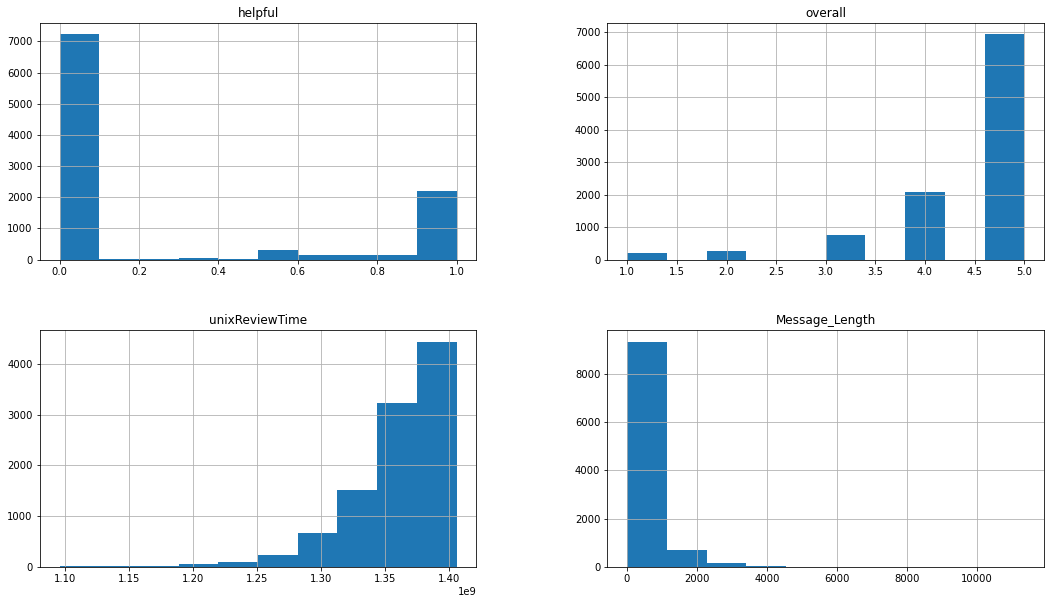

In [20]:
df.hist(figsize=(18,10))
plt.show()

Text(0.5, 0, 'Rating')

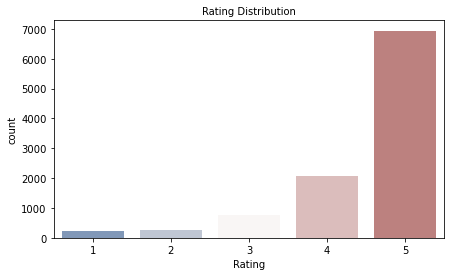

In [21]:
plt.figure(figsize=(7,4))
plt.title('Rating Distribution', fontsize=10)
sns.countplot(df.overall, palette="vlag")
plt.xlabel('Rating')

<Figure size 504x288 with 0 Axes>

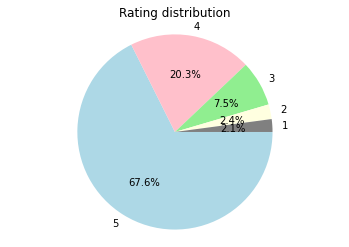

In [22]:
overall_occur = df['overall'].value_counts()
overall_v= [5,4,3,2,1]
plt.figure(figsize=(7,4))
fig, ax = plt.subplots()
ax.pie(overall_occur, labels=overall_v,  autopct='%1.1f%%', startangle=0, counterclock= False,colors=['lightblue','pink','lightgreen','lightyellow','grey'])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Rating distribution')
plt.show()

In [23]:
pd.DataFrame(df.groupby('overall')['helpful'].mean())

,helpful
overall,
1,0.330553
2,0.287600
3,0.275687
4,0.282970
5,0.253758


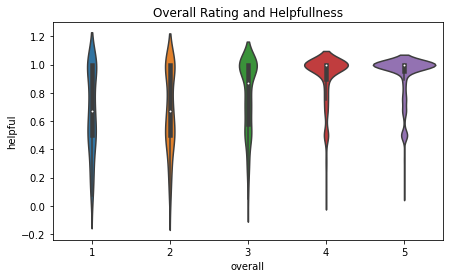

In [24]:
plt.figure(figsize=(7, 4));

senti_help= pd.DataFrame(df, columns = ['overall', 'helpful'])
senti_help = senti_help[senti_help['helpful'] != 0.00] 


sns.violinplot( x=senti_help["overall"], y=senti_help["helpful"])
plt.title('Overall Rating and Helpfullness');


Text(0.5, 0, 'Year Wise Count')

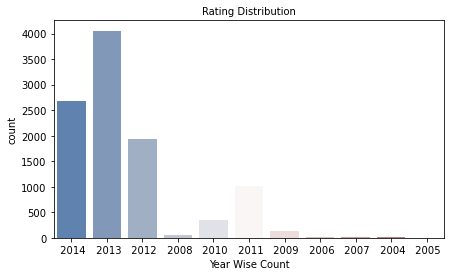

In [25]:
plt.figure(figsize=(7,4))
plt.title('Rating Distribution', fontsize=10)
sns.countplot(df.YY, palette="vlag")
plt.xlabel('Year Wise Count')

In [26]:
df['Message_Length'] = df['summary'].astype(str).map(len)

In [27]:
df['overall'].value_counts()

5    6938
4    2084
3     772
2     250
1     217
Name: overall, dtype: int64

In [28]:
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'overall', 'summary',
       'unixReviewTime', 'reviewTime', 'YY', 'DT', 'MM', 'Message_Length'],
      dtype='object')

In [29]:
df.drop(['reviewerID', 'asin', 'reviewerName', 'helpful', 'unixReviewTime', 'reviewTime'], axis=1, inplace=True)
#show new dataframe
df.head()

,overall,summary,YY,DT,MM,Message_Length
0,5,"Not much to write about here, but it does exac...",2014,02,28,273
1,5,The product does exactly as it should and is q...,2013,03,16,549
2,5,The primary job of this device is to block the...,2013,08,28,457
3,5,Nice windscreen protects my MXL mic and preven...,2014,02,14,236
4,5,This pop filter is great. It looks and perform...,2014,02,21,197


##  Step 7: Text Preprocessing

In [30]:
#get the stopwords and punctuation
punc = list(punctuation)
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [31]:
#The above stop words contain not words which might be helpful while building the ml model so we can restructure the list of stop words
stop = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'other', 'some', 'such', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y']

In [32]:
df.columns

Index(['overall', 'summary', 'YY', 'DT', 'MM', 'Message_Length'], dtype='object')

In [33]:
#Removing unnecessary columns
rating_df=df.copy()
#Creating a copy 
reviews=rating_df.copy()

In [34]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [35]:
rating_df['summary']=rating_df['summary'].apply(lambda x:review_cleaning(x))
rating_df.head()

,overall,summary,YY,DT,MM,Message_Length
0,5,not much to write about here but it does exact...,2014,02,28,273
1,5,the product does exactly as it should and is q...,2013,03,16,549
2,5,the primary job of this device is to block the...,2013,08,28,457
3,5,nice windscreen protects my mxl mic and preven...,2014,02,14,236
4,5,this pop filter is great it looks and performs...,2014,02,21,197


In [36]:
rating_df['overall']= rating_df['overall'].apply(lambda x: 1 if x > 3 else 0 )

In [37]:
rating_df.head()

,overall,summary,YY,DT,MM,Message_Length
0,1,not much to write about here but it does exact...,2014,02,28,273
1,1,the product does exactly as it should and is q...,2013,03,16,549
2,1,the primary job of this device is to block the...,2013,08,28,457
3,1,nice windscreen protects my mxl mic and preven...,2014,02,14,236
4,1,this pop filter is great it looks and performs...,2014,02,21,197


In [38]:
#Getting the target variable(encoded)
rating_df['overall'].value_counts()


1    9022
0    1239
Name: overall, dtype: int64

In [39]:
#Creating the bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)

In [40]:
#Independent Vector
X = cv.fit_transform(rating_df['summary']).toarray()
#Dependent Vector
y = rating_df['overall']

In [41]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Step 8 : Logistic Regression Model

In [42]:
logreg = LogisticRegression(C=10000.0, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of Logistic Regression Classifier on test set: {:.6f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on test set: 0.865563


In [80]:
param_grid = {'C': np.logspace(-3,3,7), 'penalty':['l1', 'l2']}
grid = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)

grid_result = grid.fit(X_train, y_train) 
print('Best Score: ', grid_result.best_score_) 
print('Best Params: ', grid_result.best_params_) 
print("The mean accuracy of the model is:",grid_result.score(X_test,y_test))

Best Score:  0.891691216475501
Best Params:  {'C': 0.1, 'penalty': 'l2'}
The mean accuracy of the model is: 0.899171943497321


In [231]:
logreg = LogisticRegression(C=0.1 ,penalty='l2' , random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of Logistic Regression Classifier on test set: {:.6f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on test set: 0.899172


In [232]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.899171943497321
Precision Score : 0.9257322175732218
Recall Score : 0.9645776566757494
F1 Score : 0.944755804643715
Confusion Matrix : 
[[  76  142]
 [  65 1770]]


Text(0.5, 15.0, 'Predicted Rating')

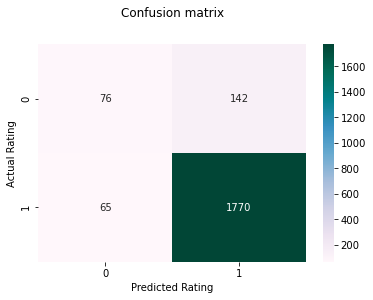

In [84]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap= "PuBuGn" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual Rating')
plt.xlabel('Predicted Rating')

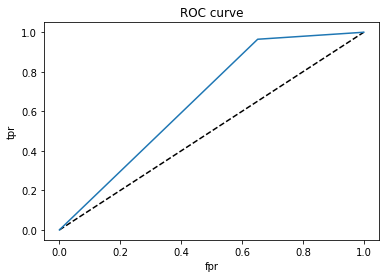

In [86]:
y_predict = logreg.predict(X_test)
from sklearn.metrics import roc_curve
y_pred_proba = logreg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression Model')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [376]:

#Area under ROC curve
from sklearn.metrics import roc_auc_score
print('Area under ROC curve',roc_auc_score(y_test,y_pred))

Area under ROC curve 0.6566007549433792


# Step 9 : ANN Classifer Model

In [ ]:
#!pip install tensorflow

In [147]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [244]:
# optimizer = Adam()
ANN_model = keras.Sequential()
ANN_model.add(Dense(units = 75 , activation = 'relu' , input_dim = X_train.shape[1]))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('linear'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('softmax'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
ANN_model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 75)                112575    
_________________________________________________________________
activation_72 (Activation)   (None, 75)                0         
_________________________________________________________________
dense_86 (Dense)             (None, 150)               11400     
_________________________________________________________________
activation_73 (Activation)   (None, 150)               0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_87 (Dense)             (None, 150)               22650     
_________________________________________________________________
activation_74 (Activation)   (None, 150)             

In [364]:

epochs_hist = ANN_model.fit(X_train, y_train, epochs = 28, batch_size = 20,validation_data=(X_test, y_test))

Epoch 1/28
411/411 [==============================] - 1s 1ms/step - loss: 0.0998 - accuracy: 0.9817 - val_loss: 0.8825 - val_accuracy: 0.8948
Epoch 2/28
411/411 [==============================] - 1s 1ms/step - loss: 0.1070 - accuracy: 0.9812 - val_loss: 0.8910 - val_accuracy: 0.8948
Epoch 3/28
411/411 [==============================] - 1s 1ms/step - loss: 0.1038 - accuracy: 0.9821 - val_loss: 0.9663 - val_accuracy: 0.8904
Epoch 4/28
411/411 [==============================] - 1s 1ms/step - loss: 0.1043 - accuracy: 0.9820 - val_loss: 1.0582 - val_accuracy: 0.8860
Epoch 5/28
411/411 [==============================] - 1s 1ms/step - loss: 0.0995 - accuracy: 0.9814 - val_loss: 0.7068 - val_accuracy: 0.9011
Epoch 6/28
411/411 [==============================] - 1s 1ms/step - loss: 0.0977 - accuracy: 0.9811 - val_loss: 0.8036 - val_accuracy: 0.8958
Epoch 7/28
411/411 [==============================] - 1s 1ms/step - loss: 0.0941 - accuracy: 0.9825 - val_loss: 1.0629 - val_accuracy: 0.8855
Epoch 

In [365]:

_, train_acc = ANN_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = ANN_model.evaluate(X_test, y_test, verbose=0)
print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))

Train Accuracy: 0.979, Test Accuracy: 0.900


In [366]:
result = ANN_model.evaluate(X_test, y_test)

65/65 [==============================] - 0s 537us/step - loss: 0.7412 - accuracy: 0.8997


In [367]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

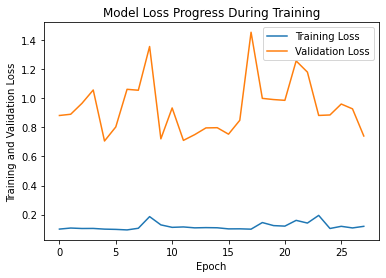

In [368]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

In [369]:
# Predicting the Test set results
y_ANNpred = ANN_model.predict(X_test)

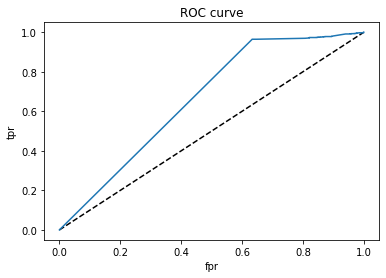

In [370]:
from sklearn.metrics import roc_curve
y_pred_proba = ANN_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [375]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
print("Area under ROC curve", roc_auc_score(y_test,y_pred_proba))

Area under ROC curve 0.6631215158863085


In [372]:
y_p=np.where(y_ANNpred < 0.5 , 0, 1)


In [373]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_p)))
print('Precision Score : ' + str(precision_score(y_test,y_p)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_p)))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_p)))

Accuracy Score : 0.8996590355577204
Precision Score : 0.9262166405023547
Recall Score : 0.9645776566757494
F1 Score : 0.9450080085424454
Confusion Matrix : 
[[  77  141]
 [  65 1770]]


Text(0.5, 15.0, 'Predicted Rating')

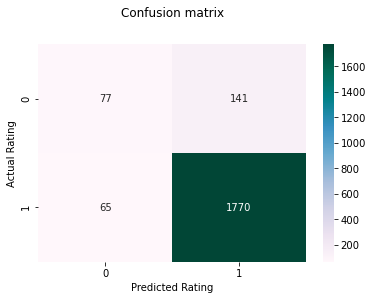

In [374]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_p)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap= "PuBuGn" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual Rating')
plt.xlabel('Predicted Rating')